# Customer Support Question Answering Chatbot
 
 developed by:
 Rakesh Kanneeswaran Maravar
- Email: rakikanneeswaran@gmail.com
- GitHub: https://github.com/rakeshkanneeswaranofficial
- LinkedIn: https://www.linkedin.com/in/rakeshkanneeswaran/

## Diagramatic Repersentation of Workflow 

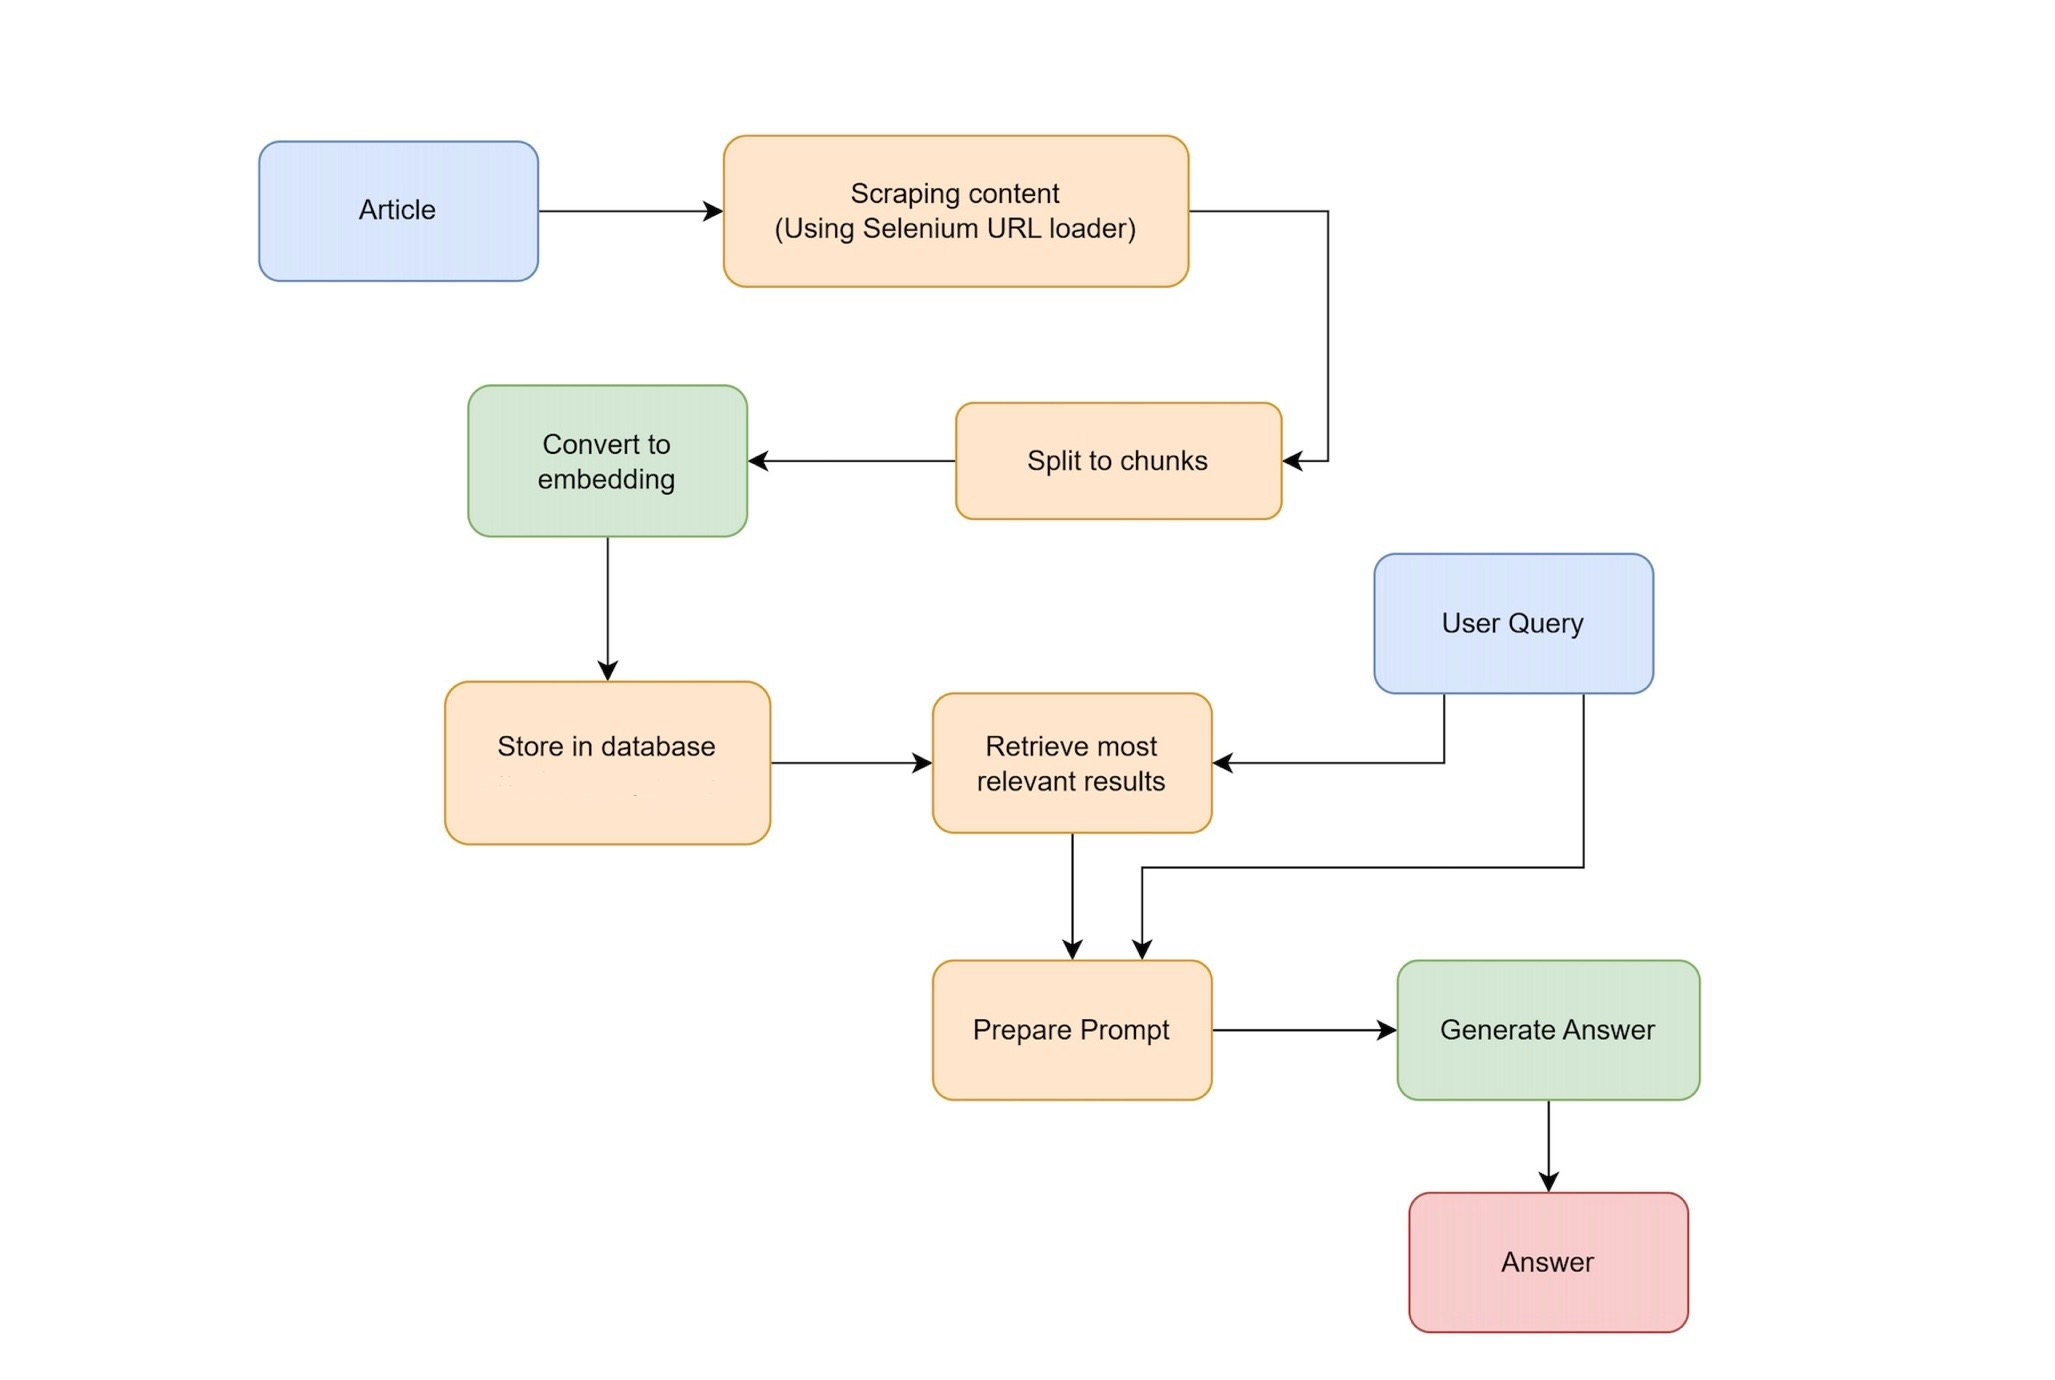

In [1]:
pip install unstructured selenium

  Obtaining dependency information for unstructured from https://files.pythonhosted.org/packages/a6/d9/ef588e0b160f96ebb6e6399cfa74e3ede6ed6f7ba2d62db2e0993ba223c9/unstructured-0.10.16-py3-none-any.whl.metadata
  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/f9/2f/9c6eef6487faca5006ae1ba43cf6ab627c7e3d2a7ec5a3b8728e2105472d/selenium-4.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/96/c6/0114b2040a96561fd1b44c75df749bbd3c898bf8047fb5ce8d7590d2dee6/emoji-2.8.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for python-iso639 from https://files.pythonhosted.org/packages/b8/6d/5d1f7e5c1b0c58b700eb67dbb570f9381afc90bc0535686a89e90eac5dfb/python_iso639-2023.6.15-

Note: you may need to restart the kernel to use updated packages.


## Defining Dependencies

In [33]:
from langchain.vectorstores import FAISS
from langchain.text_splitter import CharacterTextSplitter
from langchain import OpenAI
from langchain.document_loaders import SeleniumURLLoader
from langchain import PromptTemplate
import os
from langchain.embeddings import  HuggingFaceEmbeddings
from langchain.memory import ConversationBufferMemory
from langchain.chains.question_answering import load_qa_chain
    


## Defenining Open AI API Key

In [44]:
os.environ["OPENAI_API_KEY"] = "Your API Key"

## Defining URLS Paths to Get the Required Articals

In [8]:
# we'll use information from the following articles
urls = ['https://beebom.com/what-is-nft-explained/',
        'https://beebom.com/how-delete-spotify-account/',
        'https://beebom.com/how-download-gif-twitter/',
        'https://beebom.com/how-use-chatgpt-linux-terminal/',
        'https://beebom.com/how-delete-spotify-account/',
        'https://beebom.com/how-save-instagram-story-with-music/',
        'https://beebom.com/how-install-pip-windows/',
        'https://beebom.com/how-check-disk-usage-linux/']

## Initializing SeleniumURLLoader and Extracting The Content

In [45]:
loader = SeleniumURLLoader(urls=urls)
docs_not_splitted = loader.load()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## Defining The Charater Splitting Parameters and Splitting the Scrapped Content

In [9]:

# we split the documents into smaller chunks
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(docs_not_splitted)

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Created a chunk of size 1226, which is longer than the specified 1000


## verifing  whether the content has been loaded sucessfully or not


In [10]:
docs[0]

Document(page_content='Home  Internet  NFTs Explained: What is an NFT and What is Its Use\n\nNFTs Explained: What is an NFT and What is Its Use\n\nArjun Sha\n\nLast Updated: December 6, 2021 4:42 pm\n\nAfter Bitcoin and Blockchain, NFT is another word to have entered our lexicon. The buzzword is everywhere and people are wondering what is NFT and what is its use? Well, there is not really a one-line explainer. And that’s why we have brought a comprehensive explainer on NFT, what is its use in digital art, and more. So without wasting any time, let’s go ahead and learn about NFTs (Non-fungible Token) in complete detail.\n\nWhat is NFT: A Definitive Explainer (2021)\n\nHere, we have mentioned all the questions that people have in their minds regarding NFT. You can click on the table to find all the sections that we have covered in this article and click on the link to move to the corresponding section.\n\nTable of Contents\n\nNFTs Explained: What is NFT in Crypto?\n\nWhat is the Use of N

## Importing  Embeddings Module

In [16]:
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

## Creating Vector Database Using FAISS for Faster Similarity Search

In [19]:
faiss_db = FAISS.from_documents(docs, embeddings)

In [36]:
result = faiss_db.similarity_search("how to delete spotify accounts")


## Giving memory to the Model to concerntrate to the context of the user

In [37]:
# Create a ConversationBufferMemory instance.
memory = ConversationBufferMemory(memory_key="chat_history", input_key="question")

# Load the QA chain with memory.
chain = load_qa_chain(OpenAI(), chain_type="stuff", memory=memory)

## Defining the Function to perform Question and Answering

In [41]:
def answer_question(query):
    """
    Answer a question using the loaded model and preprocessed embeddings.
    """
    # Search for documents similar to the query within the preprocessed embeddings
    docs = faiss_db.similarity_search(query)

    # Get the answer from the model
    answer = chain.run(input_documents=docs, question=query)
    return answer

In [42]:
result = answer_question("What Happens When You Delete Your Spotify Account")

In [43]:
print(result)

 When you permanently delete your Spotify account, all of your data will be erased forever and you won’t have access to any of your Spotify data anymore. You will lose access to your playlists and saved music, liked songs, followers, and followings. You will also not be able to use your Spotify username again in the future.
